In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [154]:
data = pd.read_csv('housing.csv')


In [155]:
data.head(n=10)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
5  6.430   5.21     18.7  602700.0
6  6.012  12.43     15.2  480900.0
7  6.172  19.15     15.2  569100.0
8  5.631  29.93     15.2  346500.0
9  6.004  17.10     15.2  396900.0

In [156]:
data.tail(n=10)

RM  LSTAT  PTRATIO      MEDV
479  5.390  21.14     19.2  413700.0
480  5.794  14.10     19.2  384300.0
481  6.019  12.92     19.2  445200.0
482  5.569  15.10     19.2  367500.0
483  6.027  14.33     19.2  352800.0
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

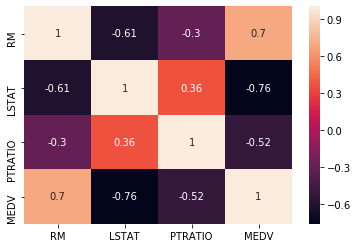

In [176]:
# data.info()
sns.heatmap( data.corr(), annot=True )


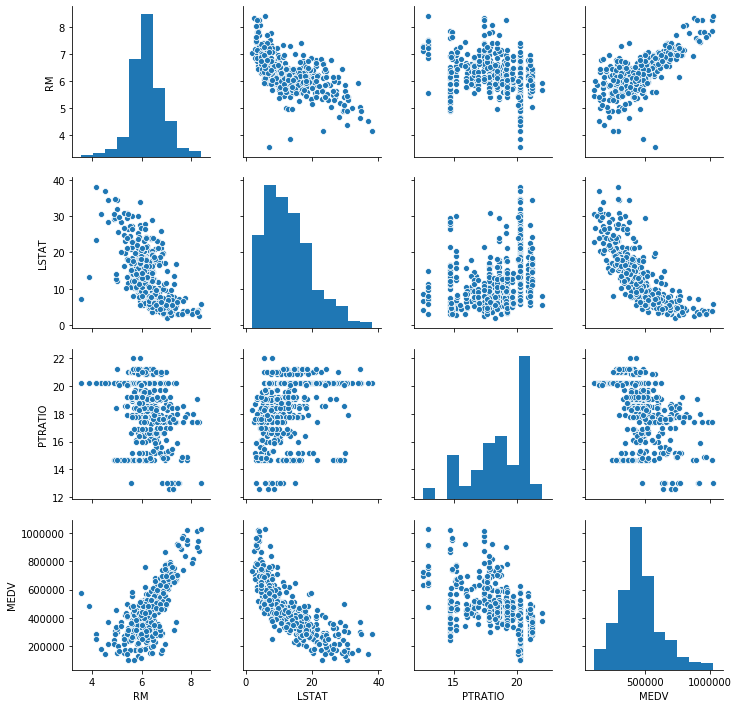

In [158]:
# data.describe()
sns.pairplot(data)

In [177]:
features = data.columns[:-1]
target = data.columns[-1]
target

'MEDV'

In [160]:
unit_train = (data[features] - data[features].min()) / (data[features].max() - data[features].min())
unit_train.var().sort_values()

RM         0.017707
LSTAT      0.038721
PTRATIO    0.050446
dtype: float64

In [161]:
features = features.drop('PTRATIO')

In [162]:
X = data[features]
y = data[target]


In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.25, random_state=42 )

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lr = LinearRegression()

In [167]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

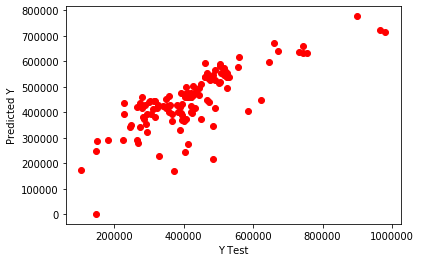

In [171]:
plt.scatter(y_test,predictions, color="r")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [170]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 76678.90663090393
MSE: 8910265231.695084
RMSE: 94394.20126096244


In [113]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
RM     101269.874073
LSTAT  -11863.997046